In [2]:
##DECOMPOSITION of video frames 14/03/2021
import sys
import shutil

import numpy as np
from math import floor
import pandas as pd
import numpy as np
import cv2

import os
import time
from PIL import Image
import math

# command line arguments --> file name, video_file_name, gpu or cpu 


# first decompose the video to frames
# place the video to be detected into the directory


#video = sys.argv[1]
#pred_text_file_name = sys.argv[2]

# resize image
#output = cv2.resize(src, dsize)


start = time.time()
text_file = 'frames.txt'

print('decomposing video to frames this may take a while  for large videos :) .....')
frames_path = 'video_frames/'
os.makedirs('video_frames/', exist_ok=True)
#os.makedirs('predictions/', exist_ok=True)

f = open(text_file, 'w+')
# Opens the Video file
cap= cv2.VideoCapture('/content/NAD57.mpg')
i=1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    scale_percent = 25

#calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)

# dsize
    dsize = (width, height)

    output = cv2.resize(frame, dsize) 
    frame_path = frames_path + 'frame_' + str(i) + '.jpg'
    cv2.imwrite("/content/video_frames/frame_"+ str(i) + ".jpg", output)
    f.write(frame_path + '\n')
    i+=1

cap.release()
cv2.destroyAllWindows()
print("decomposition complete")

end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

decomposing video to frames this may take a while  for large videos :) .....
decomposition complete
Runtime of the program is 0.002141714096069336


Streaming output truncated to the last 5000 lines.
(60, 88, 3)
11193
11194
2.881722752403907e-05
(60, 88, 3)
11194
11195
2.5684288676982543e-05
(60, 88, 3)
11195
11196
5.443181746426622e-06
(60, 88, 3)
11196
11197
3.2658613679930364e-05
(60, 88, 3)
11197
11198
1.3796644114900107e-05
(60, 88, 3)
11198
11199
2.558210902034504e-05
(60, 88, 3)
11199
11200
2.9555501556738596e-05
(60, 88, 3)
11200
11201
1.1884075366969515e-05
(60, 88, 3)
11201
11202
2.8452141006368882e-05
(60, 88, 3)
11202
11203
5.7927556434056806e-05
(60, 88, 3)
11203
11204
1.1877493045059971e-05
(60, 88, 3)
11204
11205
2.276126946955642e-05
(60, 88, 3)
11205
11206
1.4060228818155867e-05
(60, 88, 3)
11206
11207
1.9387143512568968e-05
(60, 88, 3)
11207
11208
2.194576238058748e-05
(60, 88, 3)
11208
11209
2.455875430004823e-05
(60, 88, 3)
11209
11210
3.0510178060051994e-05
(60, 88, 3)
11210
11211
5.155935403787492e-06
(60, 88, 3)
11211
11212
3.0788872468954597e-05
(60, 88, 3)
11212
11213
1.9383426453377623e-05
(60, 88, 3)
1121

No handles with labels found to put in legend.


(60, 88, 3)
12443
12444
4.4326746673251036e-06
(60, 88, 3)
12444
12445
1.1307234672100483e-05
(60, 88, 3)
12445
12446
7.649152954473427e-06
(60, 88, 3)
12446
12447
9.105613951342592e-06
(60, 88, 3)
12447
12448
8.621734847641805e-06
(60, 88, 3)
12448
12449
8.116376213924076e-06
(60, 88, 3)
12449
12450
1.0566486453546442e-05
(60, 88, 3)
12450
12451
1.9073533929455795e-05
(60, 88, 3)
12451
12452
2.218927969065676e-05
(60, 88, 3)
12452
12453
2.738180719575507e-05
(60, 88, 3)
12453
12454
2.3714942242558876e-05
(60, 88, 3)
12454
12455
4.3178181444964236e-05
(60, 88, 3)
12455
12456
2.6633885097816152e-05
(60, 88, 3)
12456
12457
3.8659013426818926e-05
(60, 88, 3)
12457
12458
4.6653470694206446e-05
(60, 88, 3)
12458
12459
3.27746281325266e-05
(60, 88, 3)
12459
12460
3.262680443833934e-05
(60, 88, 3)
12460
12461
4.77678616661119e-05
(60, 88, 3)
12461
12462
3.0336575484647758e-05
(60, 88, 3)
12462
12463
3.681499367698731e-05
(60, 88, 3)
12463
12464
5.6020681732551855e-05
(60, 88, 3)
12464
12465
3

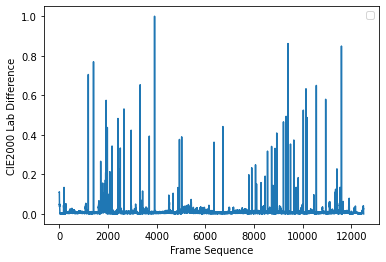

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER  both mean and standard deviation as feature
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  Lf1 = []
  af1 = []
  bf1 = []
  Lf2 = []
  af2 = []
  bf2 = []

  L1m = np.std(L1)
  a1m = np.std(a1)
  b1m = np.std(b1)

  Lf1.append(L1m)
  af1.append(a1m)
  bf1.append(b1m)
  


  L2m = np.std(L2)
  a2m = np.std(a2)
  b2m = np.std(b2)

  Lf2.append(L2m)
  af2.append(a2m)
  bf2.append(b2m)


  L1m = np.mean(L1)
  a1m = np.mean(a1)
  b1m = np.mean(b1)

  Lf1.append(L1m)
  af1.append(a1m)
  bf1.append(b1m)


  L2m = np.mean(L2)
  a2m = np.mean(a2)
  b2m = np.mean(b2)

  Lf2.append(L2m)
  af2.append(a2m)
  bf2.append(b2m)

  Lf1 = np.array(Lf1)
  af1 = np.array(af1)
  bf1 = np.array(bf1)

  Lf2 = np.array(Lf2)
  af2 = np.array(af2)
  bf2 = np.array(bf2)


#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,len(Lf1)):
    diff = diff + CIEDE2000((Lf1[i], af1[i], bf1[i]), (Lf2[i], af2[i], bf2[i]))
  #diff = CIEDE2000((L1m, a1m, b1m), (L2m, a2m, b2m))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Streaming output truncated to the last 5000 lines.
11218
11219
1.844838458784882e-05
(60, 88, 3)
11219
11220
0.00460080006687954
(60, 88, 3)
11220
11221
6.897825823531919e-06
(60, 88, 3)
11221
11222
1.552828182566458e-05
(60, 88, 3)
11222
11223
3.19550164079614e-05
(60, 88, 3)
11223
11224
0.00455790155744297
(60, 88, 3)
11224
11225
0.004546087375593811
(60, 88, 3)
11225
11226
0.004523740175375389
(60, 88, 3)
11226
11227
0.004516912943287134
(60, 88, 3)
11227
11228
1.2491303568856335e-05
(60, 88, 3)
11228
11229
0.004452590891633804
(60, 88, 3)
11229
11230
0.004429577407780398
(60, 88, 3)
11230
11231
0.00443606084764978
(60, 88, 3)
11231
11232
6.220386647370633e-06
(60, 88, 3)
11232
11233
0.0044291323925395015
(60, 88, 3)
11233
11234
0.004420917011124809
(60, 88, 3)
11234
11235
0.004386607527006888
(60, 88, 3)
11235
11236
0.004378549636854909
(60, 88, 3)
11236
11237
1.4372746361284719e-05
(60, 88, 3)
11237
11238
0.00439794194968429
(60, 88, 3)
11238
11239
0.00439787766857296
(60, 88, 3)


No handles with labels found to put in legend.


12468
12469
0.005091389160030747
(60, 88, 3)
12469
12470
5.039504984764665e-05
(60, 88, 3)
12470
12471
0.004894923281159596
(60, 88, 3)
12471
12472
5.451528540484598e-05
(60, 88, 3)
12472
12473
0.0046552298834016195
(60, 88, 3)
12473
12474
5.73484438489665e-05
(60, 88, 3)
12474
12475
4.895583071488752e-05
(60, 88, 3)
12475
12476
8.063242680801644e-05
(60, 88, 3)
12476
12477
6.172302587701611e-05
(60, 88, 3)
12477
12478
0.00403519605182869
(60, 88, 3)
12478
12479
7.313871793227253e-05
(60, 88, 3)
12479
12480
0.0037832161720541425
(60, 88, 3)
12480
12481
6.208957017879972e-05
(60, 88, 3)
12481
12482
0.0035403750685183174
(60, 88, 3)
12482
12483
0.003410736728902729
(60, 88, 3)
12483
12484
8.125614152724985e-05
(60, 88, 3)
12484
12485
0.0031205063204789592
(60, 88, 3)
12485
12486
0.002989453943303919
(60, 88, 3)
12486
12487
6.145290093568854e-05
(60, 88, 3)
12487
12488
0.0027184517298458424
(60, 88, 3)
12488
12489
6.114001026462268e-05
(60, 88, 3)
12489
12490
0.0024426139990500507
(60, 88

ZeroDivisionError: ignored

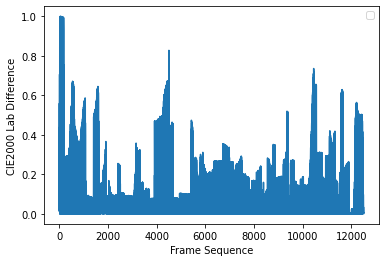

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER PCA on  both mean and standard deviation as feature
# and threshold calculation as Bendrao[2017] //VERY POOR RESULTS
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
import seaborn
import time

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  Lf1 = []
  af1 = []
  bf1 = []
  Lf2 = []
  af2 = []
  bf2 = []

  L1m = np.std(L1)
  a1m = np.std(a1)
  b1m = np.std(b1)

  Lf1.append(L1m)
  af1.append(a1m)
  bf1.append(b1m)
  


  L2m = np.std(L2)
  a2m = np.std(a2)
  b2m = np.std(b2)

  Lf2.append(L2m)
  af2.append(a2m)
  bf2.append(b2m)


  L1m = np.mean(L1)
  a1m = np.mean(a1)
  b1m = np.mean(b1)

  Lf1.append(L1m)
  af1.append(a1m)
  bf1.append(b1m)


  L2m = np.mean(L2)
  a2m = np.mean(a2)
  b2m = np.mean(b2)

  Lf2.append(L2m)
  af2.append(a2m)
  bf2.append(b2m)

  Lf1 = np.array(Lf1)
  af1 = np.array(af1)
  bf1 = np.array(bf1)

  Lf2 = np.array(Lf2)
  af2 = np.array(af2)
  bf2 = np.array(bf2)

  Ld1 = []
  ad1 = []
  bd1 = []
  for i in range(0,len(Lf1)):
    Ld1.append(Lf1[i])
    ad1.append(af1[i])
    bd1.append(bf1[i])

  Ld1 = np.array(Ld1)
  ad1 = np.array(ad1)
  bd1 = np.array(bd1)

  mat1 = {}
  mat1['L'] = Ld1
  mat1['a'] = ad1
  mat1['b'] = bd1

  Ld2 = []
  ad2 = []
  bd2 = []
  for i in range(0,len(Lf2)):
    Ld2.append(Lf2[i])
    ad2.append(af2[i])
    bd2.append(bf2[i])

  Ld2 = np.array(Ld2)
  ad2 = np.array(ad2)
  bd2 = np.array(bd2)

  mat2 = {}
  mat2['L'] = Ld2
  mat2['a'] = ad2
  mat2['b'] = bd2

#PCA for dimensionality reduction
  feat1 = pd.DataFrame(mat1)
  pca = sklearnPCA(n_components=1)
  redfeat1 = pca.fit_transform(feat1)

  
  feat2 = pd.DataFrame(mat2)
  pca = sklearnPCA(n_components=1)
  redfeat2 = pca.fit_transform(feat2)



#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,len(Lf1)):
    for i in range(0,redfeat1.shape[0]):
      diff = diff + CIEDE2000((redfeat1[i][0], 0, 0), (redfeat2[i][0], 0, 0))
  #diff = CIEDE2000((L1m, a1m, b1m), (L2m, a2m, b2m))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
alpha = 2.081
cont = np.array(labdiff)
cont = cont/max(cont)

newx = np.mean(cont)
sig = np.std(cont)

T = newx + alpha * sig

ab_cut = []
#deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(cont[i] > T):
    ab_cut.append(i)#+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
#print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




256
(256, 1)
16


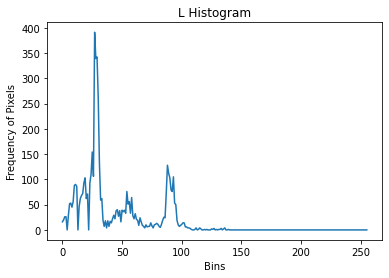

In [ ]:
#Lab histogram
import cv2                      #Import Opencv
import os 
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("/content/video_frames/frame_10.jpg")
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
L1, a1, b1 = cv2.split(img_lab)

img_L_hist = cv2.calcHist([img_lab], [0], None, [256], [0, 256])
#print(img_L_hist)
#print(img_L_hist.shape)
print(len(img_L_hist))
#print(img_L_hist[[0]])
Lf = np.array(img_L_hist)
print(Lf.shape)
Lf = Lf.ravel()
print(np.int(Lf[0]))

plt.plot(img_L_hist)
plt.title('L Histogram')
plt.xlabel('Bins')
plt.ylabel('Frequency of Pixels')
plt.show()






Streaming output truncated to the last 5000 lines.
11258
11259
1.3540860745910406
(60, 88, 3)
11259
11260
1.4514875248982368
(60, 88, 3)
11260
11261
1.2864306952988551
(60, 88, 3)
11261
11262
1.2698489826546304
(60, 88, 3)
11262
11263
1.5411183856571833
(60, 88, 3)
11263
11264
1.3163012629067168
(60, 88, 3)
11264
11265
1.4436968989500394
(60, 88, 3)
11265
11266
0.9747703239916534
(60, 88, 3)
11266
11267
1.2291295542161096
(60, 88, 3)
11267
11268
1.3345514659742141
(60, 88, 3)
11268
11269
1.429823925502921
(60, 88, 3)
11269
11270
1.3268551495414016
(60, 88, 3)
11270
11271
1.1861943374520065
(60, 88, 3)
11271
11272
1.449634254031488
(60, 88, 3)
11272
11273
1.4882386983922393
(60, 88, 3)
11273
11274
1.5096371426635626
(60, 88, 3)
11274
11275
1.4427361876441425
(60, 88, 3)
11275
11276
1.279459374267811
(60, 88, 3)
11276
11277
1.3197974957095484
(60, 88, 3)
11277
11278
1.3856414850212346
(60, 88, 3)
11278
11279
1.346212061250226
(60, 88, 3)
11279
11280
1.2662215710993157
(60, 88, 3)
11280
1

No handles with labels found to put in legend.


12508
12509
0.021553547256646086
(60, 88, 3)
12509
12510
0.0055401349316940044
1.0
[2.11217137e-01 2.22101963e-01 2.88321018e-01 ... 1.22486680e-03
 1.11943333e-03 2.87739722e-04]
60
[403, 406, 412, 414, 1213, 1216, 1331, 1545, 1840, 1923, 2064, 2113, 2217, 2307, 2549, 2646, 2797, 3093, 3463, 3837, 4054, 4659, 4662, 4806, 5016, 5076, 5169, 5548, 5551, 5563, 6288, 6498, 6863, 7928, 8047, 8203, 8244, 8429, 8598, 8696, 8864, 9004, 9075, 9351, 9461, 9538, 9640, 9777, 9872, 9959, 10167, 10267, 10321, 10702, 11086, 11480, 11483, 11549, 11656, 11734]
[  403   406   412   414  1213  1216  1331  1545  1840  1923  2064  2113
  2217  2307  2549  2646  2797  3093  3463  3837  4054  4659  4662  4806
  5016  5076  5169  5548  5551  5563  6288  6498  6863  7928  8047  8203
  8244  8429  8598  8696  8864  9004  9075  9351  9461  9538  9640  9777
  9872  9959 10167 10267 10321 10702 11086 11480 11483 11549 11656 11734]
['1331', '1545', '1840', '1923', '2064', '2113', '2217', '2307', '2549', '2646', '27

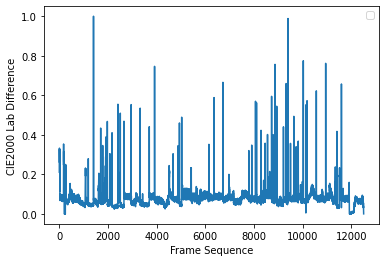

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER with HISTOGRAM feature
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  #L1, a1, b1 = cv2.split(Lab1)
  #L2, a2, b2 = cv2.split(Lab2)

  img_L1_hist = cv2.calcHist([Lab1], [0], None, [256], [0, 256])
  Lf1 = np.array(img_L1_hist)
  Lf1 = Lf1.ravel()

  img_a1_hist = cv2.calcHist([Lab1], [1], None, [256], [0, 256])
  af1 = np.array(img_a1_hist)
  af1 = af1.ravel()

  img_b1_hist = cv2.calcHist([Lab1], [2], None, [256], [0, 256])
  bf1 = np.array(img_b1_hist)
  bf1 = bf1.ravel()

  img_L2_hist = cv2.calcHist([Lab2], [0], None, [256], [0, 256])
  Lf2 = np.array(img_L2_hist)
  Lf2 = Lf2.ravel()

  img_a2_hist = cv2.calcHist([Lab2], [1], None, [256], [0, 256])
  af2 = np.array(img_a2_hist)
  af2 = af2.ravel()

  img_b2_hist = cv2.calcHist([Lab2], [2], None, [256], [0, 256])
  bf2 = np.array(img_b2_hist)
  bf2 = bf2.ravel()
#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lf1.shape[0]):
    diff = diff + CIEDE2000((Lf1[i], af1[i], bf1[i]), (Lf2[i], af2[i], bf2[i]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(256))
  frame.append(k)
  labdiff.append(diff/(256))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




Streaming output truncated to the last 5000 lines.
11248
11249
1.647414234606669
(60, 88, 3)
11249
11250
1.312789945563559
(60, 88, 3)
11250
11251
0.9370930433501228
(60, 88, 3)
11251
11252
1.6142980321583233
(60, 88, 3)
11252
11253
1.4451725880682245
(60, 88, 3)
11253
11254
1.2386509650252633
(60, 88, 3)
11254
11255
1.4085493124494495
(60, 88, 3)
11255
11256
1.141552113685498
(60, 88, 3)
11256
11257
1.6825455071353559
(60, 88, 3)
11257
11258
1.5498499915286967
(60, 88, 3)
11258
11259
1.3540860745910406
(60, 88, 3)
11259
11260
1.4514875248982368
(60, 88, 3)
11260
11261
1.2864306952988551
(60, 88, 3)
11261
11262
1.2698489826546304
(60, 88, 3)
11262
11263
1.5411183856571833
(60, 88, 3)
11263
11264
1.3163012629067168
(60, 88, 3)
11264
11265
1.4436968989500394
(60, 88, 3)
11265
11266
0.9747703239916534
(60, 88, 3)
11266
11267
1.2291295542161096
(60, 88, 3)
11267
11268
1.3345514659742141
(60, 88, 3)
11268
11269
1.429823925502921
(60, 88, 3)
11269
11270
1.3268551495414016
(60, 88, 3)
11270
1

No handles with labels found to put in legend.


12498
12499
0.6674544906504158
(60, 88, 3)
12499
12500
1.0692097430083394
(60, 88, 3)
12500
12501
0.6314586210220408
(60, 88, 3)
12501
12502
0.579898046770768
(60, 88, 3)
12502
12503
0.7085071181373773
(60, 88, 3)
12503
12504
0.5911084823250633
(60, 88, 3)
12504
12505
0.1686139902546244
(60, 88, 3)
12505
12506
0.052817369626343195
(60, 88, 3)
12506
12507
0.019318896875344282
(60, 88, 3)
12507
12508
0.023583561328590907
(60, 88, 3)
12508
12509
0.021553547256646086
(60, 88, 3)
12509
12510
0.0055401349316940044
1.0
[2.11217137e-01 2.22101963e-01 2.88321018e-01 ... 1.22486680e-03
 1.11943333e-03 2.87739722e-04]
285
[  141   142   143   144   145   146   147   148   149   150   151   152
   153   154   155   156   157   158   159   160   313   314   315   316
   317   318   319   320   321   322   323   324   325   326   327   328
   329   330   331   332   333   334   335   392   393   394   395   396
   397   398   399   400   401   402   403   404   405   406   407   408
   409   410   4

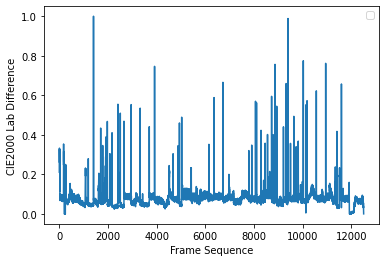

In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER with HISTOGRAM feature
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  #L1, a1, b1 = cv2.split(Lab1)
  #L2, a2, b2 = cv2.split(Lab2)

  img_L1_hist = cv2.calcHist([Lab1], [0], None, [256], [0, 256])
  Lf1 = np.array(img_L1_hist)
  Lf1 = Lf1.ravel()

  img_a1_hist = cv2.calcHist([Lab1], [1], None, [256], [0, 256])
  af1 = np.array(img_a1_hist)
  af1 = af1.ravel()

  img_b1_hist = cv2.calcHist([Lab1], [2], None, [256], [0, 256])
  bf1 = np.array(img_b1_hist)
  bf1 = bf1.ravel()

  img_L2_hist = cv2.calcHist([Lab2], [0], None, [256], [0, 256])
  Lf2 = np.array(img_L2_hist)
  Lf2 = Lf2.ravel()

  img_a2_hist = cv2.calcHist([Lab2], [1], None, [256], [0, 256])
  af2 = np.array(img_a2_hist)
  af2 = af2.ravel()

  img_b2_hist = cv2.calcHist([Lab2], [2], None, [256], [0, 256])
  bf2 = np.array(img_b2_hist)
  bf2 = bf2.ravel()
#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lf1.shape[0]):
    diff = diff + CIEDE2000((Lf1[i], af1[i], bf1[i]), (Lf2[i], af2[i], bf2[i]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(256))
  frame.append(k)
  labdiff.append(diff/(256))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
alpha = 2.081
cont = np.array(labdiff)
cont = cont/max(cont)

newx = np.mean(cont)
sig = np.std(cont)

T = newx + alpha * sig

ab_cut = []
#deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(cont[i] > T):
    ab_cut.append(i+139)
   
print(len(ab_cut))
#print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




In [ ]:
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,12510):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

  




#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lab1.shape[0]):
    for j in range(0,Lab1.shape[1]):
      diff = diff + CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i+139)

print(len(ab_cut))
print(ab_cut)
ab_cut = np.array(ab_cut)
print(ab_cut)
#print(ab_cut[0])

sl = []
with open("/content/ab_cut_gt.txt", 'r') as fileobj:
    for row in fileobj:
      sl.append(row.rstrip('\n'))
        #print( row.rstrip('\n') )
print(sl)
print(len(sl))
sl = np.array(sl)
print(sl[0])

gt = []

for i in range(0,len(sl)):
  gt.append(np.int(sl[i]))

print(gt)


TP = 0
FN = 0
FP = 0

num = 0

for i in range(0, len(gt)):
  num = gt[i]
  if num in ab_cut:
    TP = TP + 1
  else:
    FN = FN + 1

for i in range(0,len(ab_cut)):
  num = ab_cut[i]
  if num in gt:
    TP = TP + 1
  else:
    FP = FP + 1




Recall = TP/(TP+FN)

Precision = TP/(TP + FP)

F1 = 2*(Recall*Precision)/(Precision + Recall)
print("RECALL")
print(Recall)

print("PRECISION")
print(Precision)

print("F1 Score")
print(F1)





# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




(60, 88, 3)


error: ignored